## package介紹
np_utils: one-hot enconding
<br/>Sequential: build neural network model
<br/>keras.layers: design layers with activation function, Node numbers......
<br/>EarlyStopping: avoid overfitting
<br/>History: record training log

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, History
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 資料處理
輸入變成一維、正規化
<br/>輸出變成one-hot enconding

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [4]:
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [5]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 建立神經網路
使用Dropout防止過度擬和
建立三層隱藏層
活化函數都使用ReLU

In [6]:
model = Sequential()

In [7]:
model.add(Dense(1000, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [8]:
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [9]:
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [10]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, decay=1e-4, momentum=0.9), metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
__________

## 防止overfitting，所以在val_acc停止上升時提早結束

In [13]:
earlystopping = EarlyStopping(monitor='val_acc', 
                              patience=3, 
                              verbose=1, 
                              mode='max')

In [14]:
history = model.fit(x_train, y_train, 
           batch_size=100, 
           epochs=100, 
           verbose = 1, 
           validation_data = (x_test, y_test), 
           callbacks=[earlystopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.4414 - acc: 0.8657 - val_loss: 0.1669 - val_acc: 0.9479
Epoch 2/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1798 - acc: 0.9470 - val_loss: 0.1173 - val_acc: 0.9638
Epoch 3/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1310 - acc: 0.9610 - val_loss: 0.0953 - val_acc: 0.9702
Epoch 4/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1054 - acc: 0.9684 - val_loss: 0.0786 - val_acc: 0.9747
Epoch 5/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0858 - acc: 0.9741 - val_loss: 0.0714 - val_acc: 0.9773
Epoch 6/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.0706 - acc: 0.9788 - val_loss: 0.0715 - val_acc: 0.9769
Epoch 7/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.0630 - acc: 0.9807 - val_loss: 0.0650 -

In [28]:
predict = model.predict_classes(x_test)

In [29]:
def test(n):
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
    print('predict:', predict[n])

predict: 7


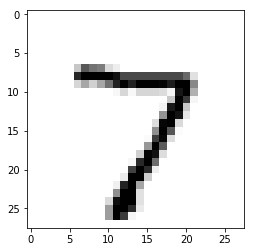

In [30]:
test(0)

## 建立較少神經元的神經網路

In [15]:
model_1 = Sequential()

In [16]:
model_1.add(Dense(100, input_dim=784))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.2))

In [17]:
model_1.add(Dense(50))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.2))

In [18]:
model_1.add(Dense(10))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.2))

In [19]:
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [20]:
model_1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, decay=1e-4, momentum=0.9), metrics=['accuracy'])

In [21]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_6 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
__________

In [22]:
history_1 = model_1.fit(x_train, y_train, 
          batch_size=100, 
          epochs=100, 
          verbose = 1, 
          validation_data = (x_test, y_test), 
          callbacks=[earlystopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 50us/step - loss: 1.0327 - acc: 0.6419 - val_loss: 0.3272 - val_acc: 0.9101
Epoch 2/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.5384 - acc: 0.8287 - val_loss: 0.2380 - val_acc: 0.9372
Epoch 3/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.4388 - acc: 0.8621 - val_loss: 0.1921 - val_acc: 0.9491
Epoch 4/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.3894 - acc: 0.8770 - val_loss: 0.1720 - val_acc: 0.9540
Epoch 5/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.3565 - acc: 0.8867 - val_loss: 0.1538 - val_acc: 0.9586
Epoch 6/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.3299 - acc: 0.8968 - val_loss: 0.1517 - val_acc: 0.9597
Epoch 7/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.3144 - acc: 0.8993 - val_loss: 0.1454 - 

## 比較兩種Model的準確度

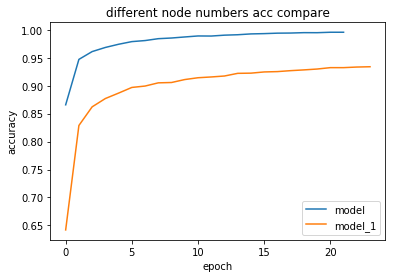

In [24]:
plt.plot(history.history['acc'])
plt.plot(history_1.history['acc'])
plt.title('different node numbers acc compare')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model', 'model_1'], loc = 'best')
plt.show()

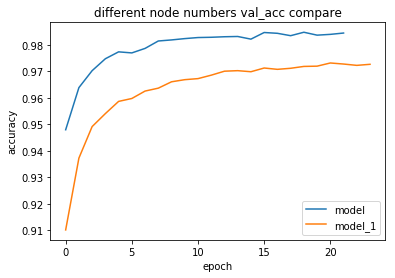

In [25]:
plt.plot(history.history['val_acc'])
plt.plot(history_1.history['val_acc'])
plt.title('different node numbers val_acc compare')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model', 'model_1'], loc = 'best')
plt.show()

## Save Model&Weights

In [26]:
model_json = model.to_json()
open("numbers.json",'w').write(model_json)
model.save_weights("numbers_weights.h5")

## Call Model&Weights

In [27]:
#model = model_from_json(open('numbers.json').read())
#model.load_weights('numbers_weights.h5')
#model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, decay=1e-4, momentum=0.9), metrics=['accuracy'])